In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('icc_wc_23_bowl.csv')

In [3]:
df.head()

,player,overs,maidens,runs,wickets,run_rate,0s,4s,6s,wd,nb,team,opponent,innings,match_id
0,Dilshan Madushanka,10.0,0,80,5,8.00,25,8,2,6,0,Sri Lanka,India,1,0
1,Dushmantha Chameera,10.0,2,71,1,7.10,28,8,2,0,0,Sri Lanka,India,1,0
2,Kasun Rajitha,9.0,0,65,0,7.22,25,7,2,1,0,Sri Lanka,India,1,0
3,Angelo Mathews,3.0,0,11,0,3.66,10,1,0,0,0,Sri Lanka,India,1,0
4,Maheesh Theekshana,10.0,0,67,0,6.70,18,5,1,1,0,Sri Lanka,India,1,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,overs,maidens,runs,wickets,run_rate,0s,4s,6s,wd,nb,innings,match_id
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,7.351045,0.256098,42.322300,1.202091,5.922369,22.918118,3.900697,1.121951,1.158537,0.097561,1.480836,23.691638
std,2.685601,0.533933,19.651473,1.193757,2.135935,10.251561,2.599953,1.302075,1.535259,0.330362,0.500068,13.858070
min,0.300000,0.000000,1.000000,0.000000,1.350000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,0.000000,30.000000,0.000000,4.500000,16.000000,2.000000,0.000000,0.000000,0.000000,1.000000,12.000000
50%,8.000000,0.000000,41.000000,1.000000,5.660000,24.000000,4.000000,1.000000,1.000000,0.000000,1.000000,24.000000
75%,10.000000,0.000000,55.000000,2.000000,7.075000,30.000000,5.000000,2.000000,2.000000,0.000000,2.000000,36.000000
max,10.000000,3.000000,115.000000,7.000000,16.000000,48.000000,15.000000,6.000000,10.000000,2.000000,2.000000,47.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    574 non-null    object 
 1   overs     574 non-null    float64
 2   maidens   574 non-null    int64  
 3   runs      574 non-null    int64  
 4   wickets   574 non-null    int64  
 5   run_rate  574 non-null    float64
 6   0s        574 non-null    int64  
 7   4s        574 non-null    int64  
 8   6s        574 non-null    int64  
 9   wd        574 non-null    int64  
 10  nb        574 non-null    int64  
 11  team      574 non-null    object 
 12  opponent  574 non-null    object 
 13  innings   574 non-null    int64  
 14  match_id  574 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 67.4+ KB


In [9]:
target_column="team"

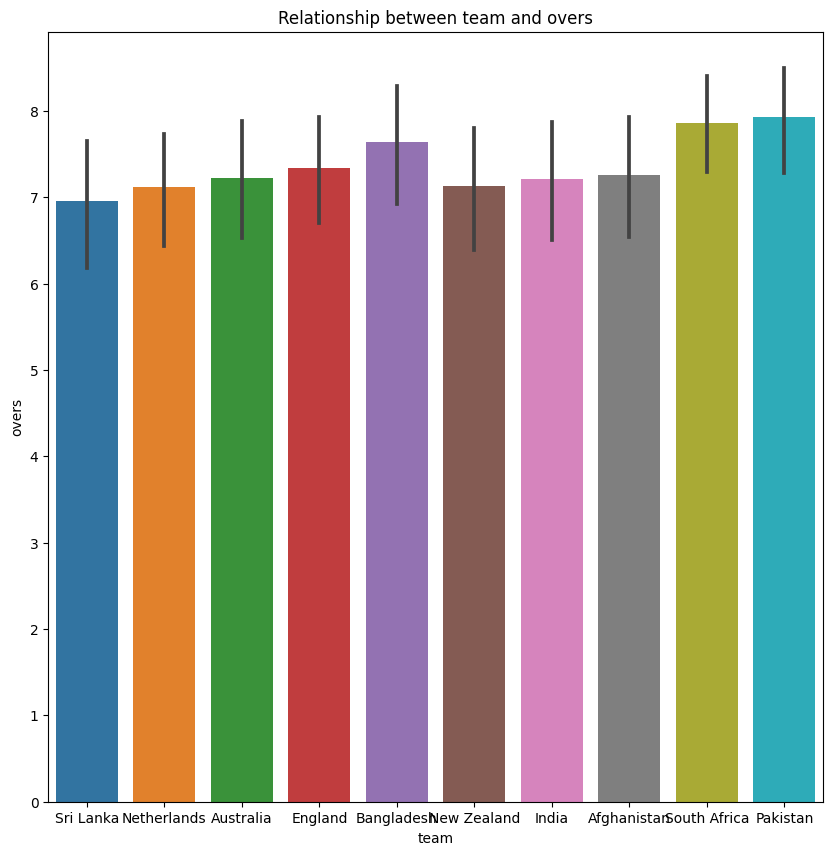

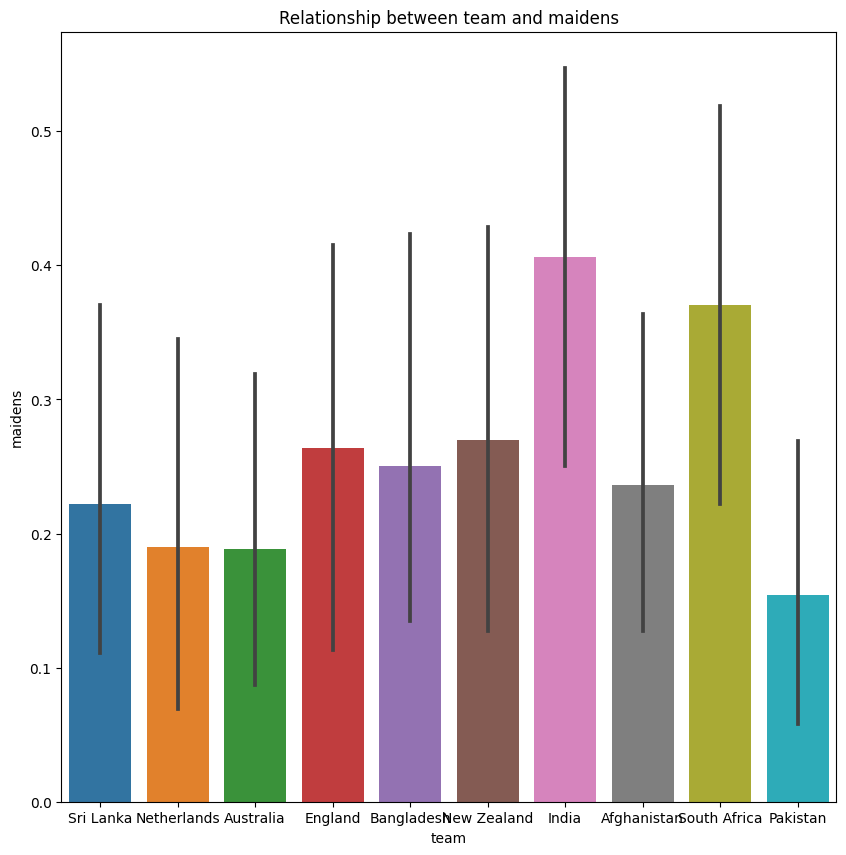

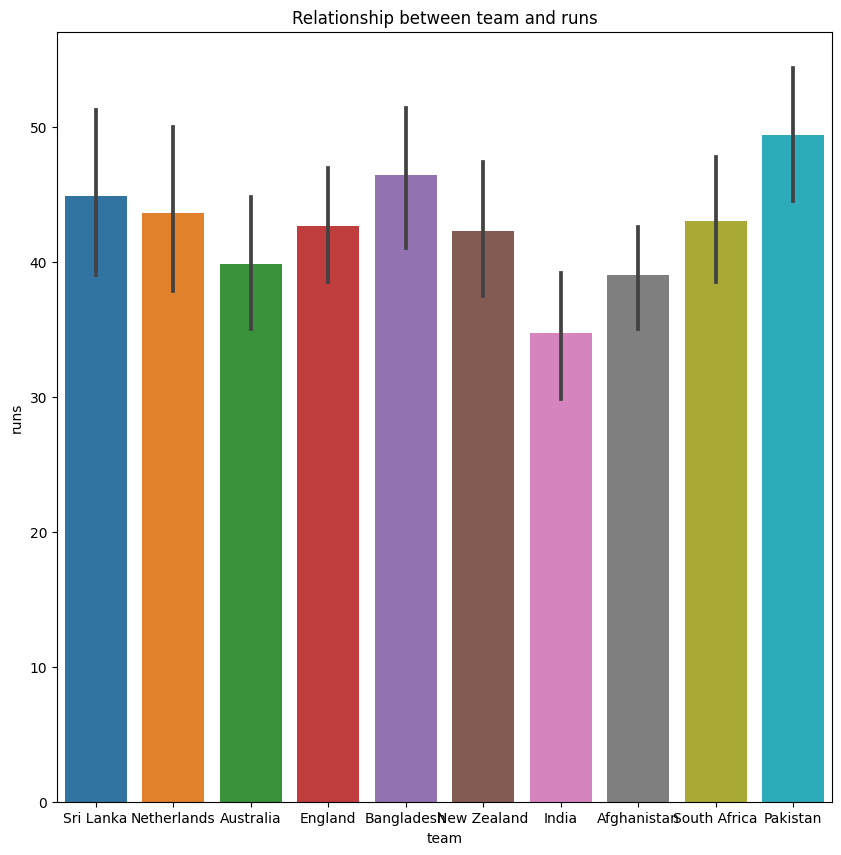

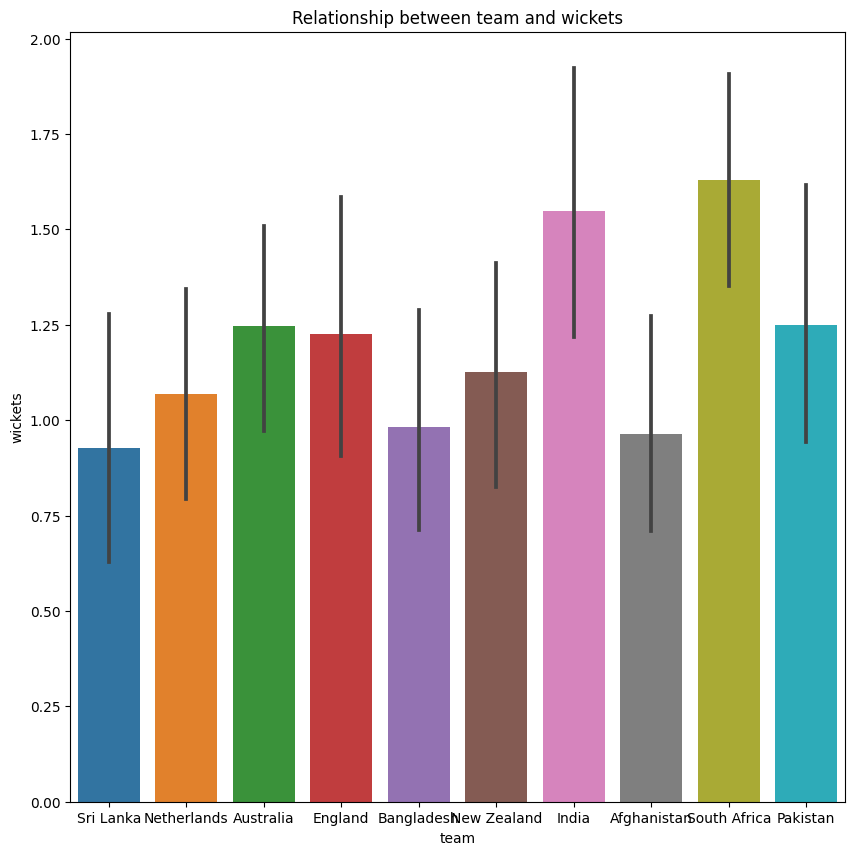

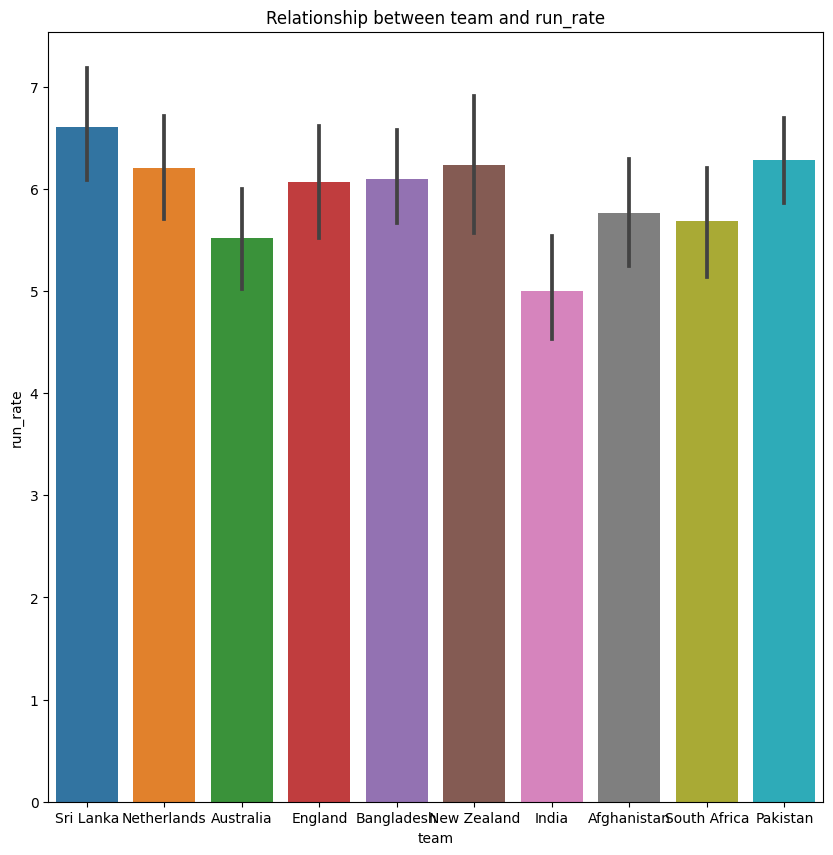

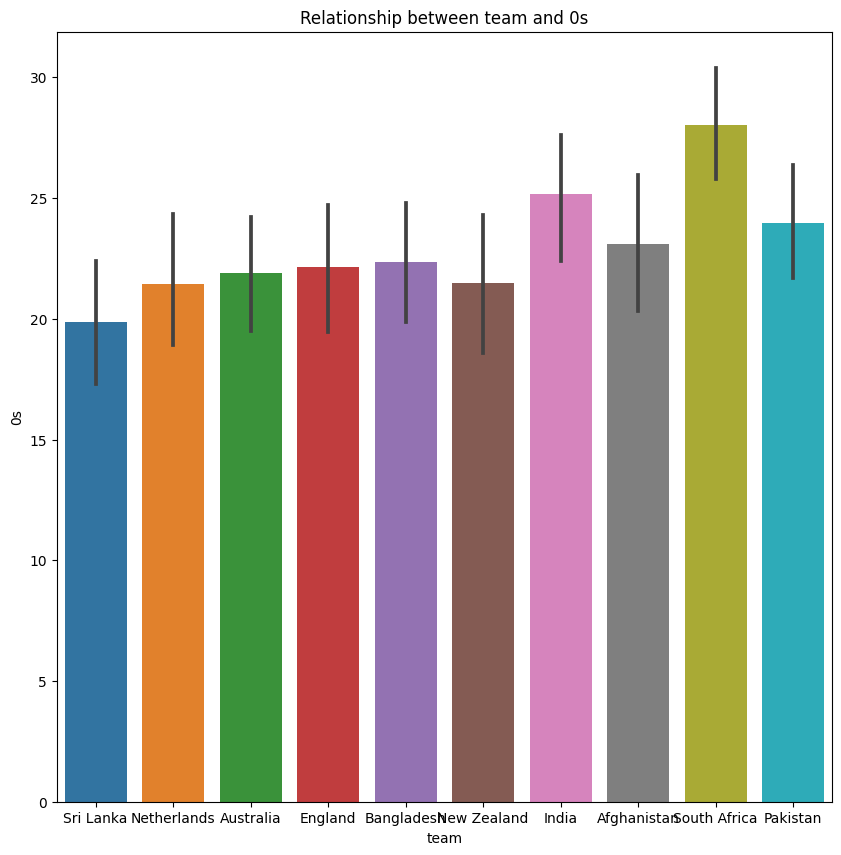

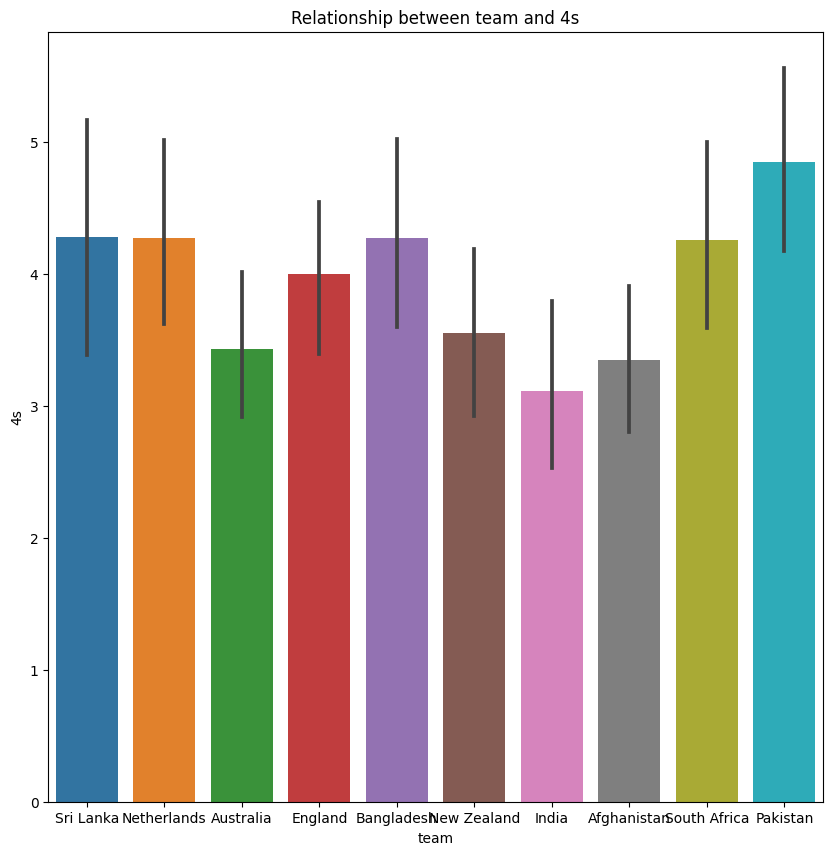

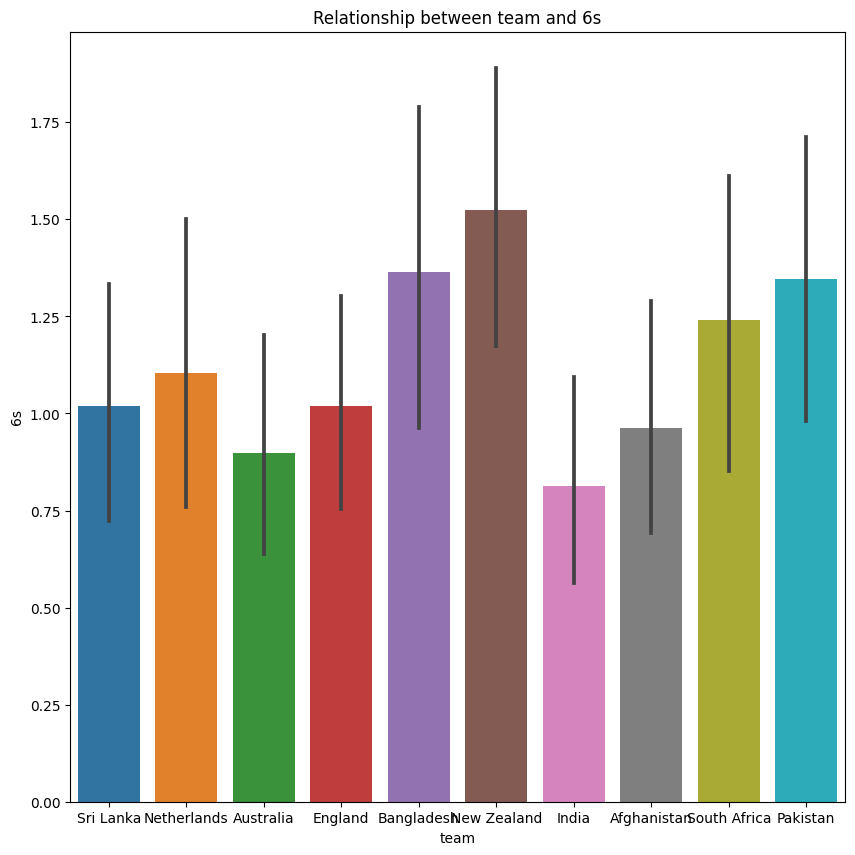

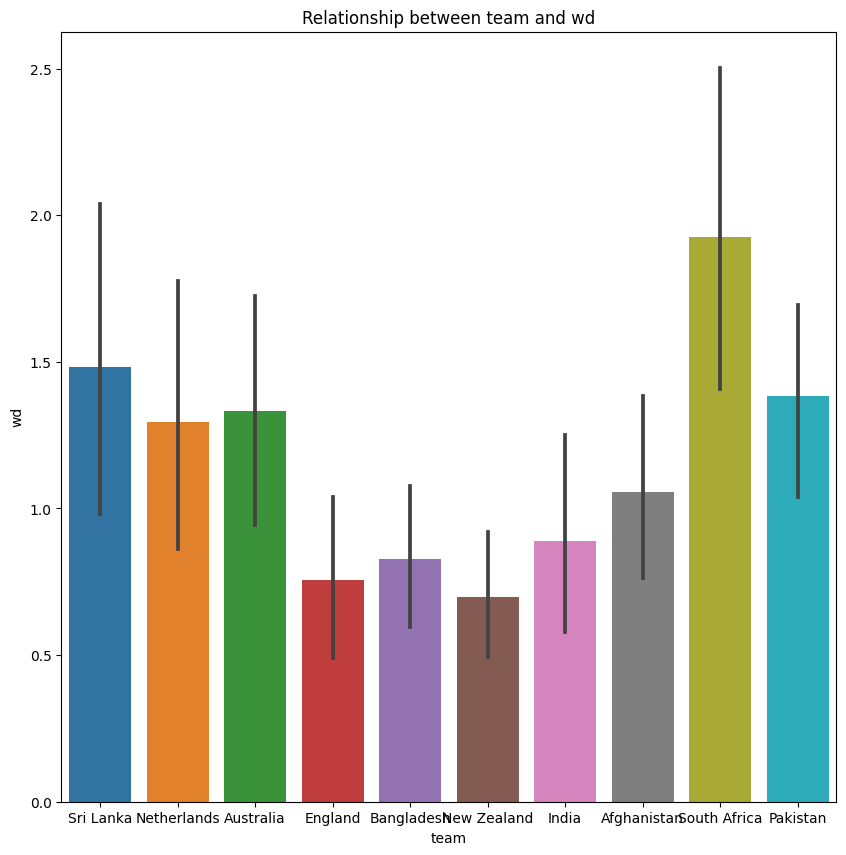

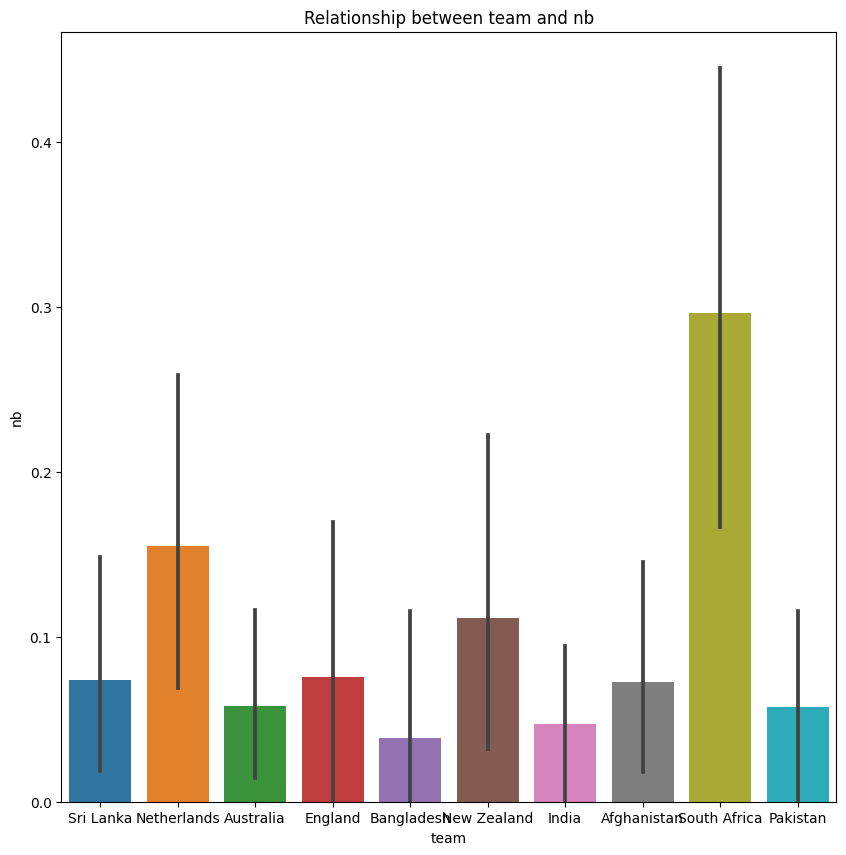

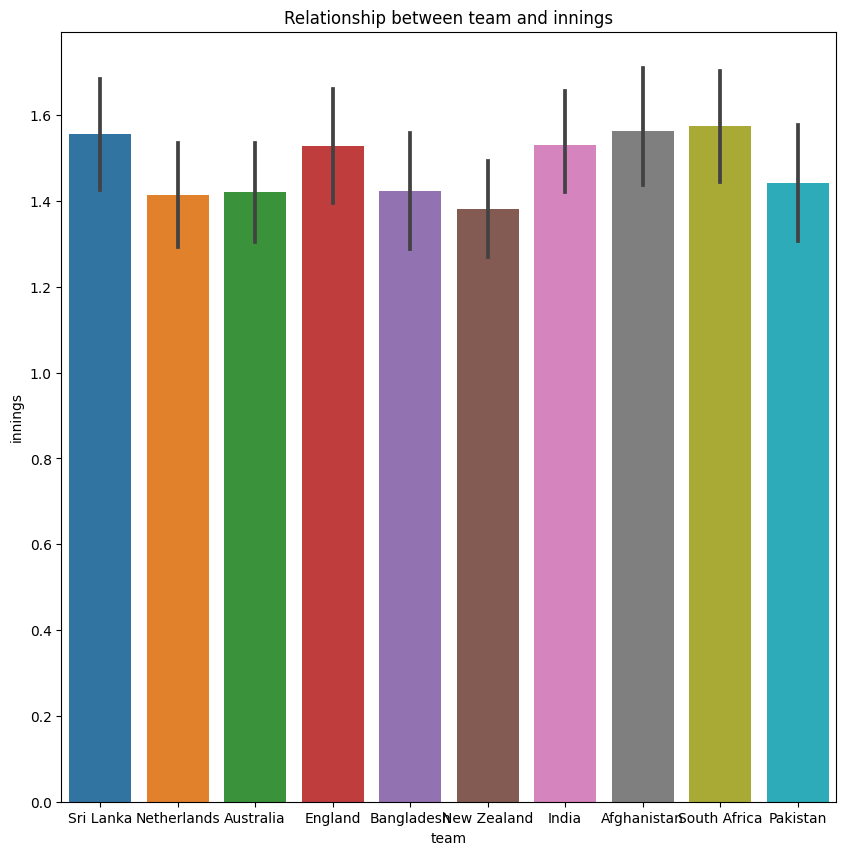

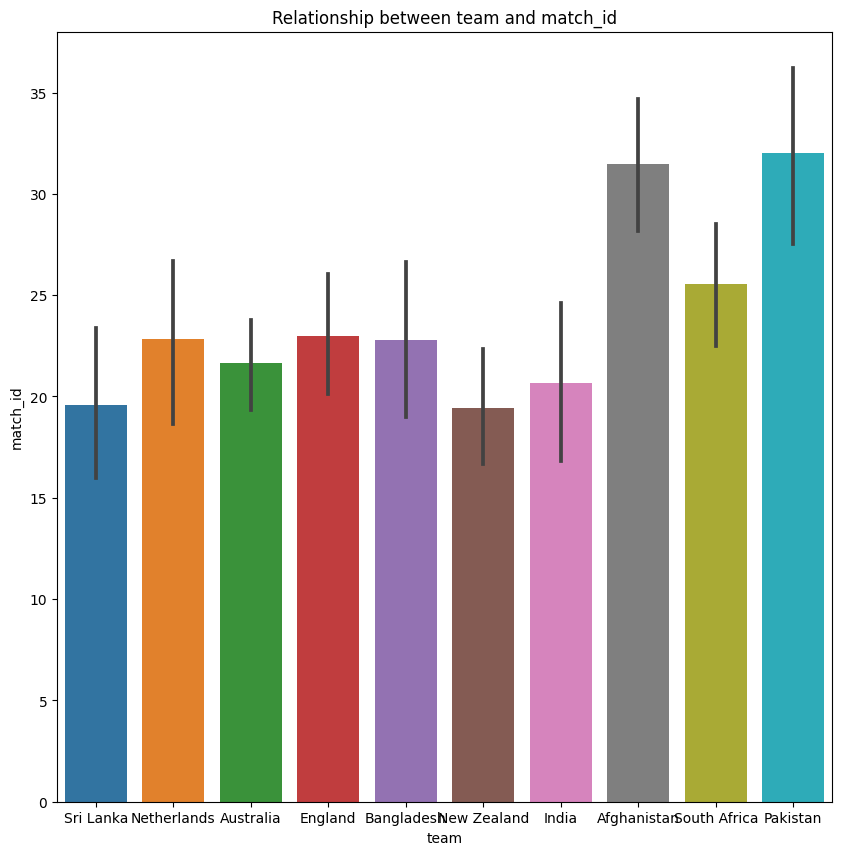

In [10]:
for column in df.columns:
    if column != target_column and pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 10))
        sns.barplot(x=target_column, y=column, data=df)
        plt.title(f'Relationship between {target_column} and {column}')
        plt.show()

In [12]:
df[['team','wickets']].groupby('team').sum().sort_values('wickets',ascending = False)

,wickets
team,
India,99
South Africa,88
Australia,86
New Zealand,71
England,65
Pakistan,65
Netherlands,62
Afghanistan,53
Bangladesh,51


In [14]:
df[["player","6s"]].groupby(["player"]).sum().sort_values("6s",ascending=False).head(10)

,6s
player,
Haris Rauf,16
Trent Boult,15
Adam Zampa,14
Rachin Ravindra,14
Mitchell Santner,14
Bas de Leede,14
Tim Southee,14
Lungi Ngidi,14
Logan van Beek,14


In [16]:
df[['team','nb']].groupby('team').sum().sort_values('nb',ascending = False)

,nb
team,
South Africa,16
Netherlands,9
New Zealand,7
Afghanistan,4
Australia,4
England,4
Sri Lanka,4
India,3
Pakistan,3


In [17]:
df[['team','6s']].groupby('team').sum().sort_values('6s',ascending = False)

,6s
team,
New Zealand,96
Bangladesh,71
Pakistan,70
South Africa,67
Netherlands,64
Australia,62
Sri Lanka,55
England,54
Afghanistan,53
